In [1]:
import pandas as pd
from pycaret.regression import *
from pycaret.datasets import get_data
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import sweetviz as sv
import warnings
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np

In [2]:
# Paso 1: Carga de Datos
file_path = 'train.csv'
data = pd.read_csv(file_path)

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# 2. Split de los datos
train_data = data.sample(frac=0.8, random_state=42)
test_data = data.drop(train_data.index)

In [5]:
print(f"Filas en Train: {train_data.shape[0]}")
print(f"Filas en Test: {test_data.shape[0]}")

Filas en Train: 1168
Filas en Test: 292


In [6]:
# 3.	EDA y Profiling de los datos. 
dataset = setup (data = train_data,
                    target = 'SalePrice',
                    session_id = 2023,
                    normalize = True,
                    normalize_method = 'minmax',
                    transformation = True
                    )

,Description,Value
0,Session id,2023
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1168, 81)"
4,Transformed data shape,"(1168, 279)"
5,Transformed train set shape,"(817, 279)"
6,Transformed test set shape,"(351, 279)"
7,Ordinal features,4
8,Numeric features,37
9,Categorical features,43


In [7]:
dataset

In [8]:
# 4.	Descripción de los warnings generados en el EDA 

def load_and_check_warnings(file_path):
    # Cargar datos
    data = pd.read_csv(file_path)

    # Análisis exploratorio aquí
    # identificar advertencias sobre valores faltantes
    missing_values = data.isnull().sum()
    missing_warnings = missing_values[missing_values > 0]
    
    if not missing_warnings.empty:
        print("Advertencias por valores faltantes:")
        print(missing_warnings)

    # Agregar otras comprobaciones según sea necesario...

    return data

# Llamada a la función para cargar y realizar comprobaciones
data = load_and_check_warnings(file_path='train.csv')

Advertencias por valores faltantes:
LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [9]:
# Generar un informe de perfil
report = sv.analyze(data)

# Guardar el informe en un archivo HTML
report.show_html("eda_report_sweetviz.html")


                                             |          | [  0%]   00:00 -> (? left)

Report eda_report_sweetviz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


5.	Setup: en base a su experiencia deberá definir y justificar por qué ha decidido realizar las operaciones de ingeniería de características que seleccione. Recuerde que debe considerar los siguientes aspectos en la ingeniería de características(hacer bien el código): 
a.	Imputación de variables numéricas. 
b.	Imputación de variables categóricas. 
c.	Codificación de variables categóricas. 
d.	Transformación de variables. 
e.	Tratamiento de Outliers. 
f.	Normalización de características. 
g.	Eliminación de características no utilizadas en el modelo. 

In [10]:

dataset = setup(data=train_data,
                session_id=2023
)

transformed_data = get_config('X_train')

,Description,Value
0,Session id,2023
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1168, 81)"
4,Transformed data shape,"(1168, 279)"
5,Transformed train set shape,"(817, 279)"
6,Transformed test set shape,"(351, 279)"
7,Ordinal features,4
8,Numeric features,37
9,Categorical features,43


6.	Entrenamiento y selección de modelos automática. Deberá comentar cuales son los primeros tres modelos ganadores y sus métricas resultantes. a.	Para cada uno de estos modelos ganadores, deberá mostrar la gráfica de importancia de características y comentar los resultados. 

In [11]:
best=compare_models(sort='MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,16807.4562,849018812.8304,27543.1540,0.8496,0.1335,0.0984,0.4570
rf,Random Forest Regressor,17868.2437,997295899.3383,30062.1124,0.8254,0.1471,0.1064,0.7250
lightgbm,Light Gradient Boosting Machine,17908.7208,961141784.9938,30096.4515,0.8393,0.1397,0.1014,0.3830
et,Extra Trees Regressor,18236.4475,885954791.9663,29136.8307,0.8421,0.1532,0.1104,0.6780
lasso,Lasso Regression,19756.1665,1818263020.4539,37500.5587,0.6813,0.1926,0.1219,0.2310
ridge,Ridge Regression,20298.3240,1631728829.2924,36013.1439,0.7050,0.2013,0.1230,0.2000
en,Elastic Net,20431.4886,1898238772.2583,38418.6867,0.6680,0.1741,0.1187,0.2530
omp,Orthogonal Matching Pursuit,21222.3434,1841975346.7857,38286.4369,0.6743,0.1870,0.1274,0.2020
ada,AdaBoost Regressor,23334.1967,1291177248.9865,35146.2688,0.7807,0.1919,0.1507,0.3700
br,Bayesian Ridge,24861.8245,2343332432.7949,44270.6775,0.5881,0.2241,0.1445,0.2100


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

In [12]:
print( best)


GradientBoostingRegressor(random_state=2023)


In [13]:
rf_model = create_model('rf')
lighmodel = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,18259.3273,659263092.6118,25676.1191,0.9152,0.1301,0.1045
1,17810.5390,714711319.2344,26734.0853,0.8390,0.1453,0.1142
2,20340.7793,1594440733.1794,39930.4487,0.8525,0.1733,0.1208
3,15769.0624,506420179.4215,22503.7814,0.8947,0.1185,0.0854
4,14365.9496,479029974.5602,21886.7534,0.9086,0.1271,0.0870
5,17931.4344,736238755.9961,27133.7199,0.8527,0.1292,0.0946
6,16671.5024,502247167.7576,22410.8716,0.8893,0.1572,0.1202
7,17649.9405,770866707.8679,27764.4865,0.8301,0.1562,0.1097
8,21327.1120,2995112213.1436,54727.6184,0.4031,0.1951,0.1263


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,18248.3959,862401986.4754,29366.6816,0.8890,0.1283,0.0971
1,15751.2870,641721894.4913,25332.2303,0.8555,0.1276,0.0947
2,19107.6707,1856722668.5108,43089.7049,0.8282,0.1590,0.1029
3,15583.8200,491326575.2660,22165.8876,0.8978,0.1161,0.0848
4,16223.2066,544406593.3102,23332.5222,0.8962,0.1186,0.0891
5,17961.1019,786896533.0368,28051.6761,0.8425,0.1302,0.0936
6,17865.4374,591269550.9095,24316.0349,0.8697,0.1532,0.1185
7,17583.3271,682847058.6261,26131.3425,0.8495,0.1544,0.1130
8,20374.8128,1822319305.3636,42688.6320,0.6369,0.1739,0.1162


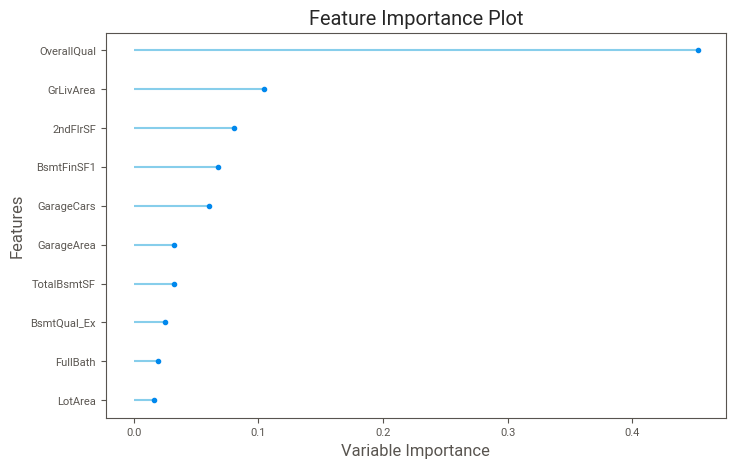

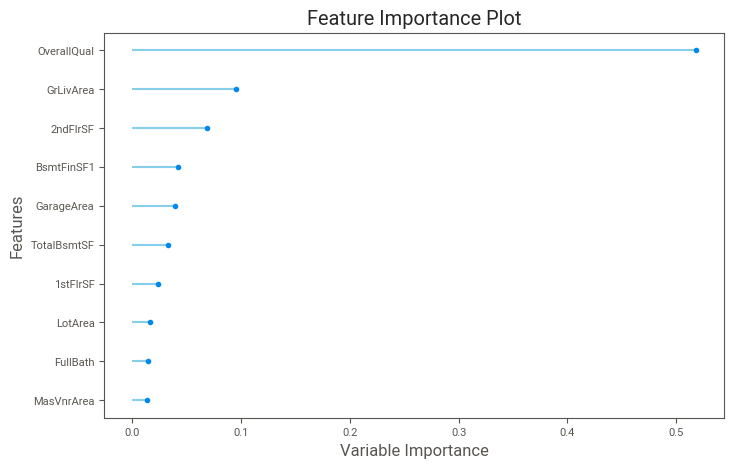

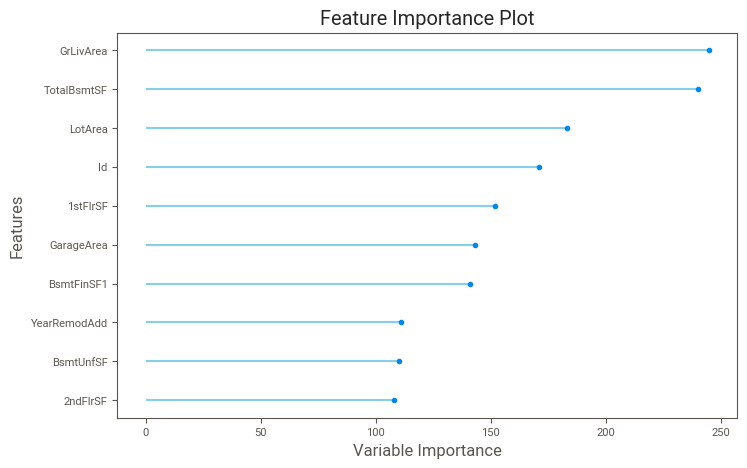

In [14]:
# Obtener la importancia de características y guardar la gráfica
plot_model(best, plot='feature', save=False, verbose=False)
plot_model(rf_model, plot='feature', save=False, verbose=False)
plot_model(lighmodel, plot='feature', save=False, verbose=False)

    # Mostrar la gráfica de importancia de características
plt.show()

7.	Optimización de hiper-parámetros: De los primeros dos modelos deberá realizar Optimización de hiper-parámetros. 

In [15]:
#Hiperparametro
tuned_best = tune_model (estimator = best) 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,16412.1134,501998524.3601,22405.3236,0.9354,0.1208,0.0968
1,17867.0014,720640144.9658,26844.7415,0.8377,0.1462,0.1140
2,19151.7271,1729895088.5964,41592.0075,0.8400,0.1658,0.1093
3,15779.9795,572078386.2288,23918.1602,0.8811,0.1119,0.0812
4,18106.6466,705060474.1652,26552.9749,0.8655,0.1317,0.0972
5,17325.7713,604927113.3438,24595.2661,0.8789,0.1257,0.0935
6,18944.3671,1105391746.3267,33247.4322,0.7564,0.1664,0.1243
7,16741.7554,605837767.3405,24613.7719,0.8665,0.1458,0.1056
8,20244.9677,2999798461.7490,54770.4159,0.4022,0.1873,0.1156


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


8.	Selección del modelo final: en función de los resultados obtenidos por la Optimización de hiper-parámetros deberá seleccionar el modelo ganador. 

In [16]:
#seleccion de modelo final
final_model = finalize_model(estimator = best)

9.	Almacenamiento del pipeline en el disco duro. 

In [17]:
save_model(model=final_model, model_name = 'models/model_v1')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Id', 'MSSubClass', 'LotFrontage',
                                              'LotArea', 'OverallQual',
                                              'OverallCond', 'YearBuilt',
                                              'YearRemodAdd', 'MasVnrArea',
                                              'BsmtFinSF1', 'BsmtFinSF2',
                                              'BsmtUnfSF', 'TotalBsmtSF',
                                              '1stFlrSF', '2ndFlrSF',
                                              'LowQualFinSF', 'GrLivArea',
                                              'BsmtFullBath', 'BsmtHalfBath',
                                              'FullBath', 'Hal...
                                                                     'Exterior1st',
                                                                     'Exterior2nd',
             

In [18]:
model=load_model('models/model_v1')
model

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\143521\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Id', 'MSSubClass', 'LotFrontage',
                                             'LotArea', 'OverallQual',
                                             'OverallCond', 'YearBuilt',
                                             'YearRemodAdd', 'MasVnrArea',
                                             'BsmtFinSF1', 'BsmtFinSF2',
                                             'BsmtUnfSF', 'TotalBsmtSF',
                                             '1stFlrSF', '2ndFlrSF',
                                             'LowQualFinSF', 'GrLivArea',
                                             'Bsm...
                                                                    'Exterior1st',
                                                                    'Exterior2nd',
                                                                    'MasVnrType',
                                                                    'ExterQual',
                                                                    'ExterCond',
                                                                    'Foundation',
                                                                    'BsmtQual',
                                                                    'BsmtCond',
                                                                    'BsmtExposure',
                                                                    'BsmtFinType1',
                                                                    'BsmtFinType2',
                                                                    'Heating',
                                                                    'HeatingQC',
                                                                    'Electrical',
                                                                    'KitchenQual',
                                                                    'Functional',
                                                                    'FireplaceQu',
                                                                    'GarageType', ...],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('actual_estimator',
                 GradientBoostingRegressor(random_state=2023))])

10.	Predicciones: Una vez almacenado el pipeline entrenado, deberá realizar las predicciones sobre el 20% de los datos almacenados para este propósito, cargando el modelo desde el path donde lo almacenó. 

In [19]:
prediccion=predict_model(model,data=test_data)
prediccion

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,prediction_label
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,164551.524583
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900,152205.065765
13,14,20,RL,91.0,10652,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,New,Partial,279500,213503.984621
14,15,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,...,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000,150428.225262
20,21,60,RL,101.0,14215,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,11,2006,New,Partial,325300,321372.546076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,1435,20,RL,80.0,17400,Pave,NaN,Reg,Low,AllPub,...,NaN,NaN,NaN,0,5,2006,WD,Normal,160000,167701.553256
1437,1438,20,RL,96.0,12444,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,11,2008,New,Partial,394617,350541.477695
1441,1442,120,RM,NaN,4426,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2008,WD,Normal,149300,139980.919844
1446,1447,20,RL,NaN,26142,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,157900,159936.364953


In [21]:
# Obtener las predicciones del conjunto de prueba
y_true = test_data['SalePrice'] 
y_pred = prediccion['prediction_label']

# Calcular las métricas
r2 = r2_score(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)

# Calcular el MAPE
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Imprimir las métricas
print(f'R2: {r2}')
print(f'RMSE: {rmse}')
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')

# `evaluate_model` de Pycaret para obtener otras métricas y visualizaciones
#evaluate_model(model)

#Imprimir el informe de evaluación detallado
#interpret_model(model)

R2: 0.9200172727937397
RMSE: 20446.48710882796
MSE: 418058835.091468
MAE: 13511.976988344562
MAPE: 7.901717600550495


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…